In [70]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
pylab.rcParams['figure.figsize'] = (16, 16)

In [71]:
from PIL import Image

In [72]:
import math

In [82]:
dataDir = "data/tiny_set/"
annFile = 'data/tiny_set/erase_with_uncertain_dataset/annotations/tiny_set_test_nobox.json'
resultFile1 = 'exp/ctdet_tiny/default/bbox.json'
resultFile2 = 'exp/ctdet_tiny/default/results.json'


In [83]:
with open(resultFile1) as f:
    result1 = json.load(f)
    
with open(resultFile2) as f:
    result2 = json.load(f)

In [91]:
imgId = 1000 # the image id to check

In [92]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [93]:
img_result1 = list(filter(lambda r: r['image_id'] == imgId, result1))
img_result1[0]['segmentation'] = []

img_result2 = list(filter(lambda r: r['image_id'] == imgId, result2))
img_result2[0]['segmentation'] = []

In [94]:
imgIds = coco.getImgIds(imgIds = [imgId])
img = coco.loadImgs(imgIds)[0]

In [95]:
I = Image.open(f"{dataDir}/test/{img['file_name']}").convert('RGB')

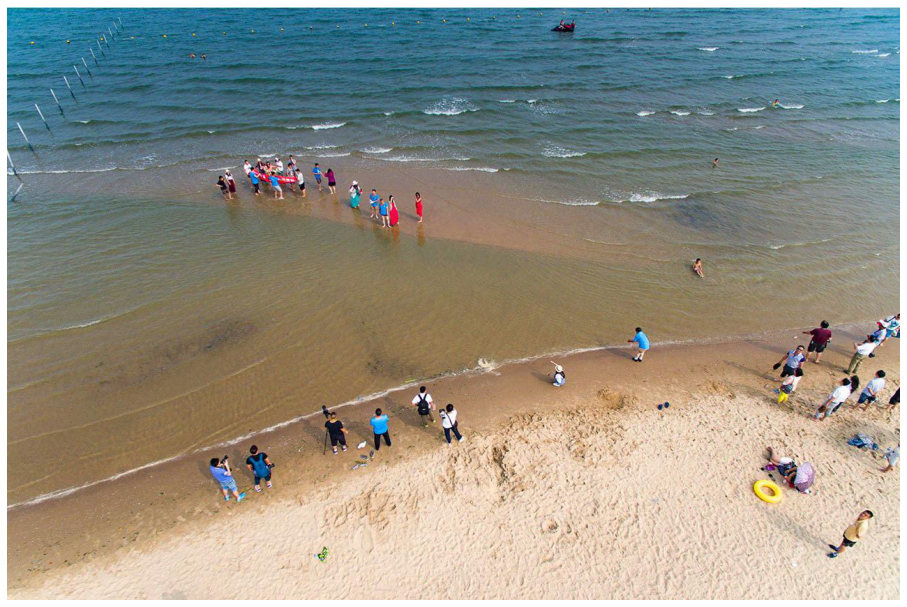

In [96]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
plt.axis('off')
plt.imshow(I)
plt.show()

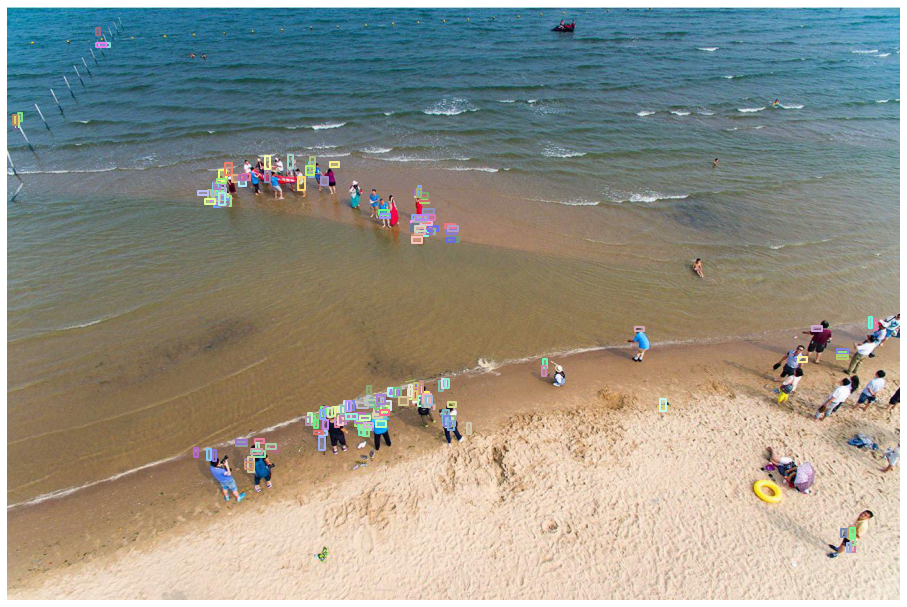

In [97]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
coco.showAnns(img_result1, draw_bbox=True)

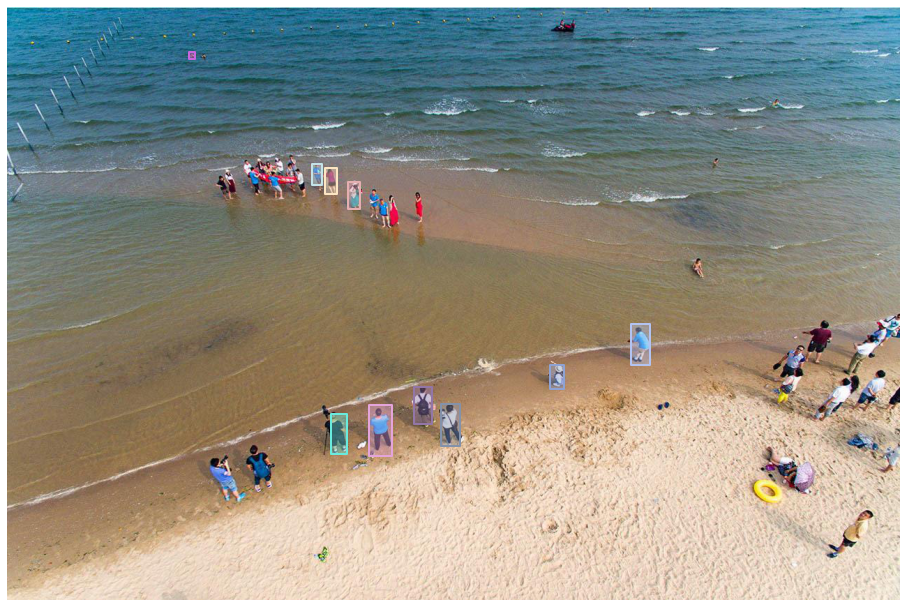

In [98]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
coco.showAnns(img_result2, draw_bbox=True)